<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/Interpolaci%C3%B3nCuadraticaTallerPunto6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np


Interpolación cuadrática
Omar Torres
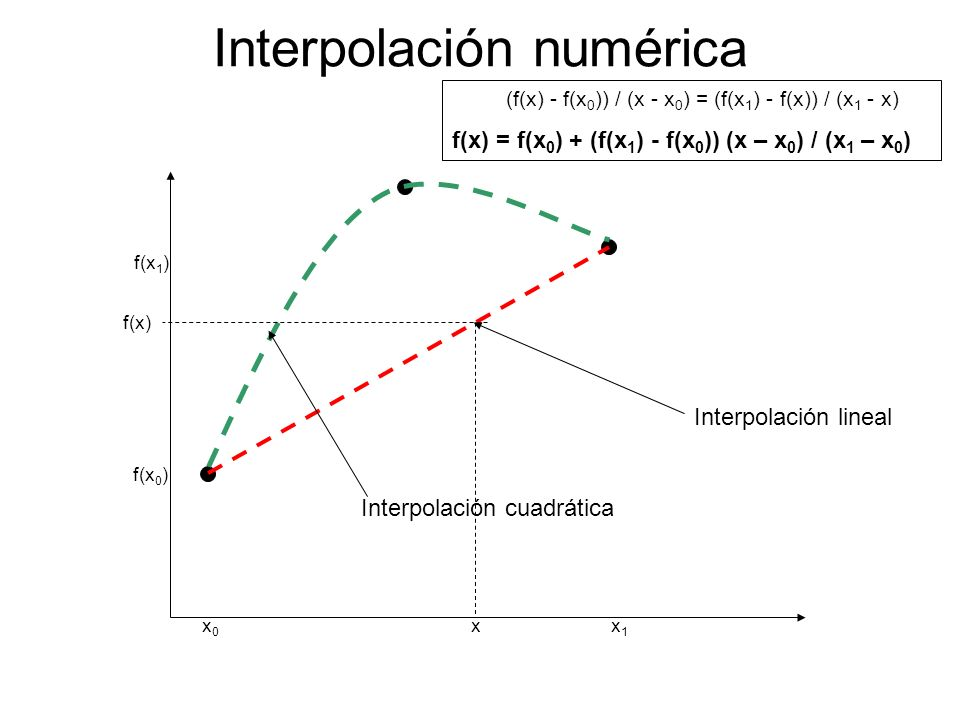

**Función para inicializar variables inicialización de variables**

In [2]:
x0=0
x1=0
x2=0
error_esperado=0
def inputIntervalo():
  print("_____________ D =[-5,5] x1 = 1 ______________")
  x0 =    int(input("Digite el extremo inferior del intervalo x0 "))
  x1 =    int(input("Digite el valor intermedio x1 "))
  x2 =    int(input("digite el valor extremo superior del intervalo x2 "))
  error_esperado = float(input("Digite el valor del error esperado "))

  return x0, x1, x2,error_esperado


In [3]:
x0, x1, x2, error_interp= inputIntervalo()

_____________ D =[-5,5] x1 = 1 ______________
Digite el extremo inferior del intervalo x0 -3
Digite el valor intermedio x1 2
digite el valor extremo superior del intervalo x2 3
Digite el valor del error esperado 0.001


**Función para graficar función**
f(x) = x^4 + 3*x^3 - 2

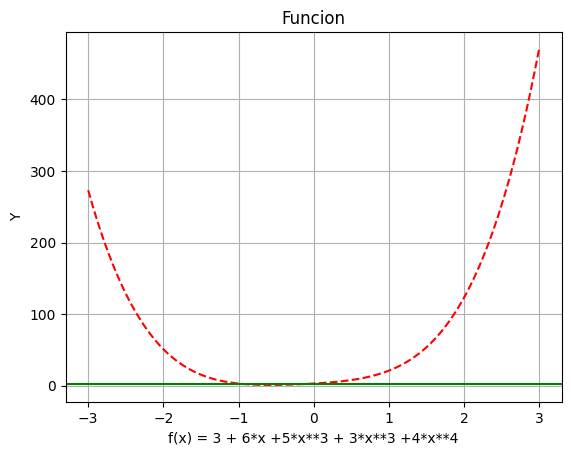

In [5]:
def graf_f_interpola_cuadra():
  X = list(np.arange(x0, x2, error_interp))
  Y=[(3 + 6*x +5*x**2 + 3*x**3 +4*x**4) for x in X]

  plt.title("Funcion")
  plt.xlabel("f(x) = 3 + 6*x +5*x**3 + 3*x**3 +4*x**4")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axhline(y=1.69, xmin=0, color="g")
  plt.grid()
  plt.show()

graf_f_interpola_cuadra()

**La clase contiene los métodos para realizar el cálculo de los mínimos**

In [11]:
class InterpCuadratica:
  def __init__(self, x0,x1, x2, error_esperado): #Inicialización de variables de la clase
     self.__x3 = 0
     self.__x0 = x0
     self.__x1 = x1
     self.__x2 = x2
     self.__error_esperado = error_esperado
     self.x0_old = x0
     self.x1_old = x1
     self.x2_old = x2
     self.x3_old = 0
     self.fx0_old = 0
     self.fx1_old = 0
     self.fx2_old = 0
     self.fx3_old = 0
     self.error_old =10
     self.__lista__error=[]

  def get_maximo(self):                               #Método público que retorna el valor máximo
    return self.fx3_old

  def get_cord_x(self):
      return  self.x3_old

  def __calculoError(self):                            #Método privado que calcula el error
    return np.abs(self.x3_old - self.x1_old)

  def getListaError(self):
      return self.__lista__error

  def __calculoFx(self, x):                             #Matodo privado que calcula la función f(x)
    fx =2* math.sin(x) - (x**2)/10
    return fx

  def __calculoF(self):                                 #Metodo que retorna los f(x0), f(x1), f(x2)
     fx0 = self.__calculoFx( self.__x0)
     fx1 = self.__calculoFx(self.__x1)
     fx2 = self.__calculoFx(self.__x2)
     return fx0, fx1, fx2

  def __set_old(self, x0,x1,x2, fx0, fx1, fx2,error):  #El metodo preserva los ultimos valores calculados
     self.x0_old = self.__x0
     self.x1_old = self.__x1
     self.x2_old = self.__x2
     #self.x3_old = self.__x3
     self.__fx0_old = x0
     self.__fx1_old = x1
     self.__fx2_old = x2
     #self.__fx3_old = x3
     self.__error_old = error

  def __printf(self, i):                              #Imprime los valores parciales de los f(x) y el error
      print("________________________________________Resultados parciales_______________________________________________________")
      print("i = ", i)
      print("x0 = ",self.x0_old, "fx0 = ",self.fx0_old)
      print("x1 = ",self.x1_old, "fx1 = ",self.fx1_old)
      print("x2 = ",self.x2_old, "fx2 = ",self.fx2_old)
      print("x3 = ",self.x3_old, "fx3 = ",self.fx3_old)
      print("error = ",self.error_old)


  def __calculoX3(self):
       fx0, fx1, fx2 = self.__calculoF()
       xup = fx0*(self.x1_old**2 - self.x2_old**2) + fx1*(self.x2_old**2 - self.x0_old**2) + fx2*(self.x0_old**2 - self.x1_old**2)
       xdown = (2*fx0*(self.x1_old - self.x2_old) + 2*fx1*(self.x2_old - self.x0_old) + 2*fx2*(self.x0_old - self.x1_old))
       self.__x3 = xup/xdown
       return self.__x3

  def calculoMinimo(self):                         #método que calcula el valor maximo en f(x)
      error = 10
      i=0
      while error >= self.__error_esperado:        #Repite ciclo mientras el error sea menor que error esperado
         fx0 = self.__calculoFx(self.x0_old)
         fx1 = self.__calculoFx(self.x1_old)
         fx2 = self.__calculoFx(self.x2_old)
         self.__set_old(self.__x0,fx0,self.__x1, fx1 ,self.__x2,fx2, error)
         x3 = self.__calculoX3()                  #Cálculo de x3
         fx3 = self.__calculoFx(x3)               #Calculo de f(x3)
         self.x3_old = x3
         self.fx3_old = fx3
         i += 1
         self.__printf(i)                         #Imprime valores parciales
         if fx3 < fx1 :                           #Se descarta X0
            self.__x0 = self.__x1
            self.__x1 = x3
            self.__x2 = self.__x2
            fx0 = fx1
            fx1 = fx3
            fx2=fx2
         else:
            if fx3 > fx1 :                        #Se descarta X2
               self.__x0 = self.__x0
               self.__x2 = self.__x1
               self.__x1 = self.__x3
               fx0 = fx0
               fx2= fx3
               fx1 = fx3
         error = self.__calculoError()            #Calculo del error
         self.__lista__error.append(error)
         self.error_old = error

obj = InterpCuadratica(x0,x1, x2, error_interp)

**Funcion principal**

In [12]:
lista_errores = []
obj = InterpCuadratica(x0,x1, x2, error_interp )
lista_errores = obj.getListaError()
def main():
  obj.calculoMinimo()                                   #Se invoca método calculo del minimo
  maximo = obj.get_maximo()                             #Obtiene el valor minimo final
  x = obj.get_cord_x()
  print()
  print()
  print("________________________________Minimo de f(x) y la coordenada x____________________________")
  print("Maximo de f(x) = ", maximo)
  print("Corrdenada x para la cual f(x) es máximo ", x)
if __name__=='__main__':
   main()

________________________________________Resultados parciales_______________________________________________________
i =  1
x0 =  -3 fx0 =  0
x1 =  2 fx1 =  0
x2 =  3 fx2 =  0
x3 =  0.1104000031807656 fx3 =  0.21913293921955423
error =  10
________________________________________Resultados parciales_______________________________________________________
i =  2
x0 =  2 fx0 =  0
x1 =  0.1104000031807656 fx1 =  0
x2 =  3 fx2 =  0
x3 =  1.3985444936967537 fx3 =  1.774809925897491
error =  1.8895999968192343
________________________________________Resultados parciales_______________________________________________________
i =  3
x0 =  2 fx0 =  0
x1 =  1.3985444936967537 fx1 =  0
x2 =  0.1104000031807656 fx2 =  0
x3 =  1.3883943558149765 fx3 =  1.774057773748907
error =  1.2881444905159882
________________________________________Resultados parciales_______________________________________________________
i =  4
x0 =  2 fx0 =  0
x1 =  1.3883943558149765 fx1 =  0
x2 =  1.3985444936967537 fx2 =  

**Graficas finales**

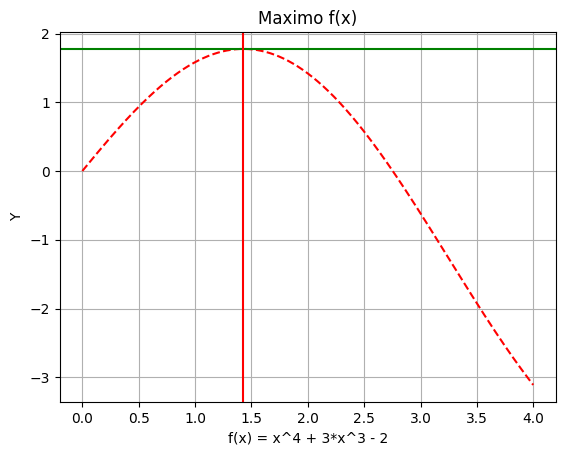

In [ ]:
def graf_f_interpola_cuadra():
  X = list(np.arange(x0, x2, error_interp))
  Y=[(2*math.sin(x) -(x**2)/10) for x in X]

  plt.title("Maximo f(x)")
  plt.xlabel("f(x) = x^4 + 3*x^3 - 2")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axhline(y=1.7757205228062285, xmin=0, color="g")
  plt.axvline(x= 1.4275517787645942, ymin=0.0, ymax=30, color = "r")
  plt.grid()
  plt.show()

graf_f_interpola_cuadra()

**Grafica del error**

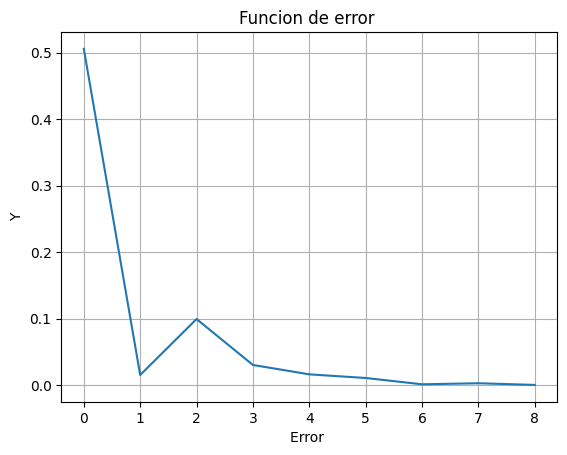

In [ ]:
xl = 0
xu = 4

def graf_f():
  X = lista_errores
  Y = np.linspace(0, 1, num=15, endpoint=False)
  plt.title("Funcion de error ")
  plt.xlabel("Error ")
  plt.ylabel("Y")
  plt.plot(lista_errores)
  plt.grid()
  plt.show()
graf_f()